# Applying PCA on dry bean dataset and finding optimal number of clusters with KMeans

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
df=pd.read_excel("D:/dataset/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [5]:
df.duplicated().sum()

68

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
x=df.drop(["Class"],axis=1)
y=df["Class"]

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xn=pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[9.99967413e-01 3.04291274e-05]


In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xn,y,test_size=0.2,random_state=7)

In [10]:
from sklearn.cluster import KMeans

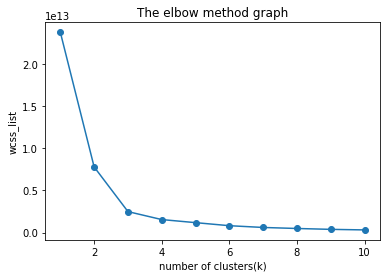

In [11]:
wcss_list=[]
for j in range(1,11):
    km=KMeans(n_clusters=j,init='k-means++',random_state=0)
    km.fit(xn)
    wcss_list.append(km.inertia_)
plt.plot(range(1,11),wcss_list,marker="o")
plt.title("The elbow method graph") 
plt.xlabel("number of clusters(k)")
plt.ylabel("wcss_list")
plt.show()

In [12]:
from kneed import KneeLocator
k1=KneeLocator(range(1,11),wcss_list,curve="convex",direction="decreasing")
k1.elbow

3

In [13]:
km=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_predict=km.fit_predict(xn)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

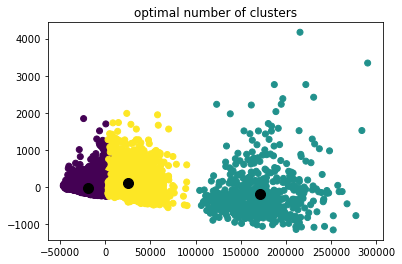

In [14]:
plt.scatter(xn[:,0],xn[:,1],c=y_predict)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c="black",label="centroid")
plt.title("optimal number of clusters")
plt.show()